In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-call-india-dataset/fraud_call.file


This notebook is for **fraud call detection** dataset. the dataset contain two type of data 
one is fraud and second is normal call data.
To detect fraud call, In this notebook i am going to used Naive Bayes classification.

when ever we start creating a model in Machine Learning the first step is perform EDA ,in the EDA first step is import/load the dataset.

In [2]:
"""import the dataset in data library"""
data = pd.read_csv("../input/fraud-call-india-dataset/fraud_call.file",sep='\t',names=['label','content'])

In [3]:
data.head()

,label,content
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


I am going to count howmany fraud and normal data is avialble in dataset.

In [4]:
data['label'].value_counts()

normal    5287
fraud      638
Name: label, dtype: int64

visualize the label column **for count** the number of fraud data and normal data.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

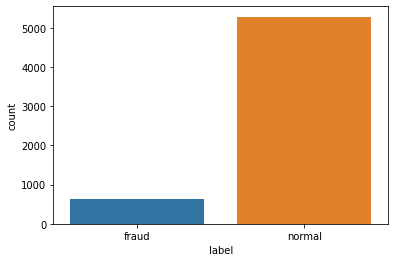

In [5]:
import seaborn as sns
sns.countplot('label',data=data)

In **machine learning technique**, Every model will take input as integer/numeric data type values,but in this dataset data are present in object type so before giving input to model we have to convert object type data to integer types.

In the below cell i have used **TfidVectorizer method** which is imported from nltk library for create a vector of words which is present dataset. **TfidVectorizer** is more better then **Bag of Words(BOW)** method.

***Note:*** for categorical/object type information, before performing encoding methods always remove stopwords from the data because  stopwords do not play important role for improve performance and accuracy of model.

so in the below cell, for removing stopwords "WordNetLemmatizer" have used. it will remove stopwords from dataset.

Ex: for,in,you,at etc these are stopwords,
**stopwords** imported from **nltk** library, this is a text Preprocessing library. 



In [6]:
"""perform text preprocessing"""
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
ps = WordNetLemmatizer()
cv = TfidfVectorizer(max_features=2000)

In [7]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['content'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

In  given below cell, **Naive Bayes** classification has used to classify whether it is fraud call or not.
before it split data in to two parts.

**1. training data
2. test data**

An in-build **train_test_split** module used to split data in to training and testing part.

In [8]:
from sklearn.metrics import recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
"""creating/training of model."""
def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['label'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
    fraud_detect = MultinomialNB().fit(x_train, y_train)
    print("model has trained.")
    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    cl_r = classification_report(y_test,y_ped)
    print("Confusion matrix:", cong_m)
    print("Accuracy_score:", acc)
    print("recall_score is:",recall)
    print("Classification report id:",cl_r)
    return fraud_detect

call **remove_digit()** for text preprocessing operation and **detect_model()** for creating classification model 
and train it by traing data as well as validate it by testing data and will return **confusion_metrics** and 
**accuracy_score**"""

In [9]:
proper_list = remove_digit(data)
model= detect_model(proper_list, data)

model has trained.
Confusion matrix: [[ 102   26]
 [   1 1056]]
Accuracy_score: 0.9772151898734177
recall_score is: 0.9990539262062441
Classification report id:               precision    recall  f1-score   support

           0       0.99      0.80      0.88       128
           1       0.98      1.00      0.99      1057

    accuracy                           0.98      1185
   macro avg       0.98      0.90      0.94      1185
weighted avg       0.98      0.98      0.98      1185



In [10]:
"""when dataset is imbalanced dataset, then we should use precision,recall or f1-score metrics function because 
accuracy will be failed in unbalance dataset  for  classification. but some time it will work fine"""


'when dataset is imbalanced dataset, then we should use precision,recall or f1-score metrics function because \naccuracy will be failed in unbalance dataset  for  classification. but some time it will work fine'

## """if you all find out this notebook  helpful, please upvote"""